<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data5_xls_features_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch

In [2]:
import pandas as pd

In [3]:
import torch
from torch import nn

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib as mpl

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns
sns.set(style="darkgrid")

In [8]:
CAD_path="/content/logs_5_xls.xlsx"

In [9]:
data = pd.read_excel("/content/logs_5_xls.xlsx")

In [10]:
display(pd.DataFrame(data))

,ID,Spec,MotherTongue,Gender,Age,Activity,DayPart,Lesson,Grade
0,29292,1,1,0,20,23,3,1,5
1,26864,2,0,1,22,7,3,0,0
2,26861,2,0,1,21,18,1,1,3
3,26760,3,1,0,22,8,1,1,5
4,26544,4,1,1,21,9,1,1,5
5,29598,11,1,1,25,7,1,1,0
6,29133,1,1,1,20,14,1,1,5
7,26604,2,0,1,23,6,1,1,4
8,29346,1,1,1,20,4,1,1,5
9,26563,4,1,1,21,14,1,1,4


Settings

In [11]:
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [12]:
pd.options.display.float_format = '{:.3f}'.format

Feature Engineering

In [13]:
df = pd.read_excel("/content/logs_5_xls.xlsx")
test_df = pd.read_excel("/content/logs_5_xls.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            17 non-null     int64
 1   Spec          17 non-null     int64
 2   MotherTongue  17 non-null     int64
 3   Gender        17 non-null     int64
 4   Age           17 non-null     int64
 5   Activity      17 non-null     int64
 6   DayPart       17 non-null     int64
 7   Lesson        17 non-null     int64
 8   Grade         17 non-null     int64
dtypes: int64(9)
memory usage: 1.3 KB


In [14]:
df.sample(n=5)

,ID,Spec,MotherTongue,Gender,Age,Activity,DayPart,Lesson,Grade
5,29598,11,1,1,25,7,1,1,0
8,29346,1,1,1,20,4,1,1,5
16,23558,4,1,0,22,7,3,0,0
12,29684,1,1,1,22,5,2,0,4
13,29723,1,1,1,20,14,1,1,4


Drop column with data to be predicted

In [15]:
train_labels = df['Grade'].copy()
df = df.drop('Grade', axis=1)

In [16]:
df.describe(include=np.number)

,ID,Spec,MotherTongue,Gender,Age,Activity,DayPart,Lesson
count,17.000,17.000,17.000,17.000,17.000,17.000,17.000,17.000
mean,27801.647,2.706,0.765,0.824,21.647,10.235,1.588,0.765
std,1758.647,2.469,0.437,0.393,1.730,5.166,0.870,0.437
min,23558.000,1.000,0.000,0.000,20.000,4.000,1.000,0.000
25%,26610.000,1.000,1.000,1.000,20.000,7.000,1.000,1.000
50%,26864.000,2.000,1.000,1.000,21.000,8.000,1.000,1.000
75%,29349.000,4.000,1.000,1.000,22.000,14.000,2.000,1.000
max,29723.000,11.000,1.000,1.000,26.000,23.000,3.000,1.000


In [17]:
def feature_engineering(df): #feature engineering function

    return df

In [18]:
df = feature_engineering(df)

Remove columns I no longer need

In [19]:
df = df.drop(['DayPart', 'Spec'], axis=1)

In [20]:
df.sample(n=5)

,ID,MotherTongue,Gender,Age,Activity,Lesson
9,26563,1,1,21,14,1
2,26861,0,1,21,18,1
10,26610,1,1,21,7,1
8,29346,1,1,20,4,1
12,29684,1,1,22,5,0


Data Cleaning

In [21]:
df.isna().sum()

ID              0
MotherTongue    0
Gender          0
Age             0
Activity        0
Lesson          0
dtype: int64

No missing values

Min-max scaling

Normalization

In [22]:
def scale_min_max(df, col_name, xmin, xmax):
    df[col_name] = (df[col_name] - xmin) / (xmax - xmin)
    return df

train_age_min = df['Age'].min()
train_age_max = df['Age'].max()
df = scale_min_max(df, 'Age', train_age_min, train_age_max)

df['Age'].describe()

count   17.000
mean     0.275
std      0.288
min      0.000
25%      0.000
50%      0.167
75%      0.333
max      1.000
Name: Age, dtype: float64

Dummy variables addition:

In [23]:
def add_dummies(df, cols):
    df = pd.get_dummies(df, columns=cols)
    return df

cols = ['ID']
df = add_dummies(df, cols)

print(df.columns, '\n', len(df.columns))



Index(['MotherTongue', 'Gender', 'Age', 'Activity', 'Lesson', 'ID_23558',
       'ID_26544', 'ID_26563', 'ID_26604', 'ID_26610', 'ID_26760', 'ID_26789',
       'ID_26861', 'ID_26864', 'ID_29133', 'ID_29292', 'ID_29346', 'ID_29349',
       'ID_29350', 'ID_29598', 'ID_29684', 'ID_29723'],
      dtype='object') 
 22


Data is procecced

In [24]:
test_proc = (test_df.pipe(feature_engineering) #Apply the same data processing steps to the test set
                    .drop(['DayPart', 'Spec'], axis=1)
                    .pipe(scale_min_max, 'Age', train_age_min, train_age_max)
                    .pipe(add_dummies, cols)
)

test_proc.sample(5)


,MotherTongue,Gender,Age,Activity,Lesson,Grade,ID_23558,ID_26544,ID_26563,ID_26604,...,ID_26861,ID_26864,ID_29133,ID_29292,ID_29346,ID_29349,ID_29350,ID_29598,ID_29684,ID_29723
13,1,1,0.000,14,1,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
16,1,0,0.333,7,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0.333,7,0,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
15,1,1,0.000,6,1,5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,1,1,0.000,14,1,5,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [25]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:16], all_data.loc[16:].drop(['Grade'], axis=1)

df_train = pd.read_excel("/content/logs_5_xls.xlsx")
df_test = pd.read_excel("/content/logs_5_xls.xlsx")


df_train.name = 'Training Set'
df_test.name = 'Test Set'


dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Grade'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 17
Number of Test Examples = 17

Training X Shape = (17, 9)
Training y Shape = 17

Test X Shape = (17, 9)
Test y Shape = 17

Index(['ID', 'Spec', 'MotherTongue', 'Gender', 'Age', 'Activity', 'DayPart',
       'Lesson', 'Grade'],
      dtype='object')
Index(['ID', 'Spec', 'MotherTongue', 'Gender', 'Age', 'Activity', 'DayPart',
       'Lesson', 'Grade'],
      dtype='object')


In [26]:
print(df_train.info())
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            17 non-null     int64
 1   Spec          17 non-null     int64
 2   MotherTongue  17 non-null     int64
 3   Gender        17 non-null     int64
 4   Age           17 non-null     int64
 5   Activity      17 non-null     int64
 6   DayPart       17 non-null     int64
 7   Lesson        17 non-null     int64
 8   Grade         17 non-null     int64
dtypes: int64(9)
memory usage: 1.3 KB
None


,ID,Spec,MotherTongue,Gender,Age,Activity,DayPart,Lesson,Grade
2,26861,2,0,1,21,18,1,1,3
6,29133,1,1,1,20,14,1,1,5
13,29723,1,1,1,20,14,1,1,4


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Spec'].plot(kind='hist', bins=20, title='Spec')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MotherTongue'].plot(kind='hist', bins=20, title='MotherTongue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ID', y='Spec', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Spec', y='MotherTongue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='MotherTongue', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='Activity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['Spec']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('Spec')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['Activity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('Activity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['Grade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('Grade')

from matplotlib import pyplot as plt
_df_12['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Spec'].plot(kind='line', figsize=(8, 4), title='Spec')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['MotherTongue'].plot(kind='line', figsize=(8, 4), title='MotherTongue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
df_train_corr = df_train.drop(['Grade'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

df_test_corr = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [28]:
# Training set high correlations
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
8,Lesson,DayPart,0.599
10,Spec,Age,0.457
12,Age,MotherTongue,0.447
14,Gender,DayPart,0.409
16,ID,Lesson,0.350
18,ID,Gender,0.343
20,Age,DayPart,0.313
22,Activity,Lesson,0.275
24,MotherTongue,DayPart,0.271
26,MotherTongue,Gender,0.257


In [29]:
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
10,DayPart,Lesson,0.599
12,Lesson,Grade,0.564
14,Spec,Grade,0.547
16,Age,Spec,0.457
18,Age,MotherTongue,0.447
20,ID,Grade,0.445
22,DayPart,Gender,0.409
24,Grade,Age,0.358
26,Lesson,ID,0.350
28,ID,Gender,0.343


from matplotlib import pyplot as plt
_df_16['Correlation Coefficient'].plot(kind='hist', bins=20, title='Correlation Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('Feature 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Correlation Coefficient'].plot(kind='line', figsize=(8, 4), title='Correlation Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Feature 1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Correlation Coefficient', y='Feature 1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

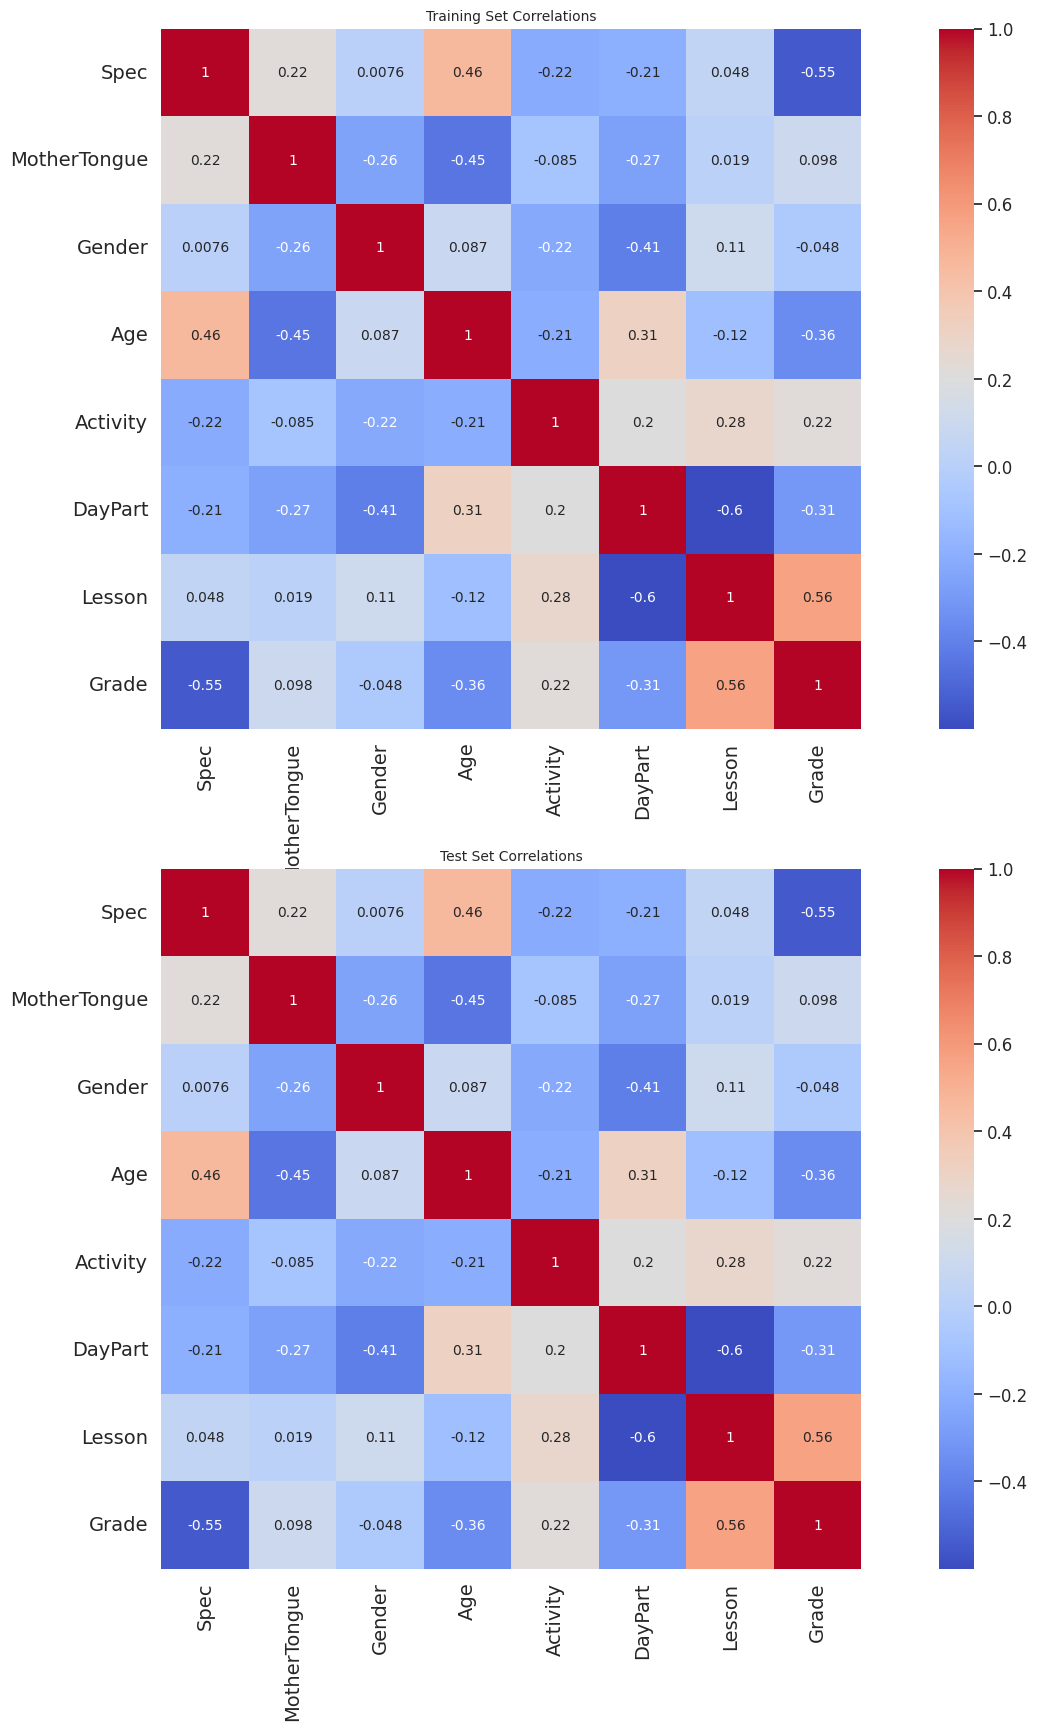

In [31]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(df_train.drop(['ID'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
sns.heatmap(df_test.drop(['ID'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)

axs[0].set_title('Training Set Correlations', size=10)
axs[1].set_title('Test Set Correlations', size=10)

plt.show()

The high correlation coefficient between parameters Grade and Lesson, Activity

Target Distribution in Features

<ipython-input-33-f4c848207e50>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[~grade][feature], label='no grade', hist=True, color='#e74c3c', ax=axs[0][i])
<ipython-input-33-f4c848207e50>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[grade][feature], label='grade', hist=

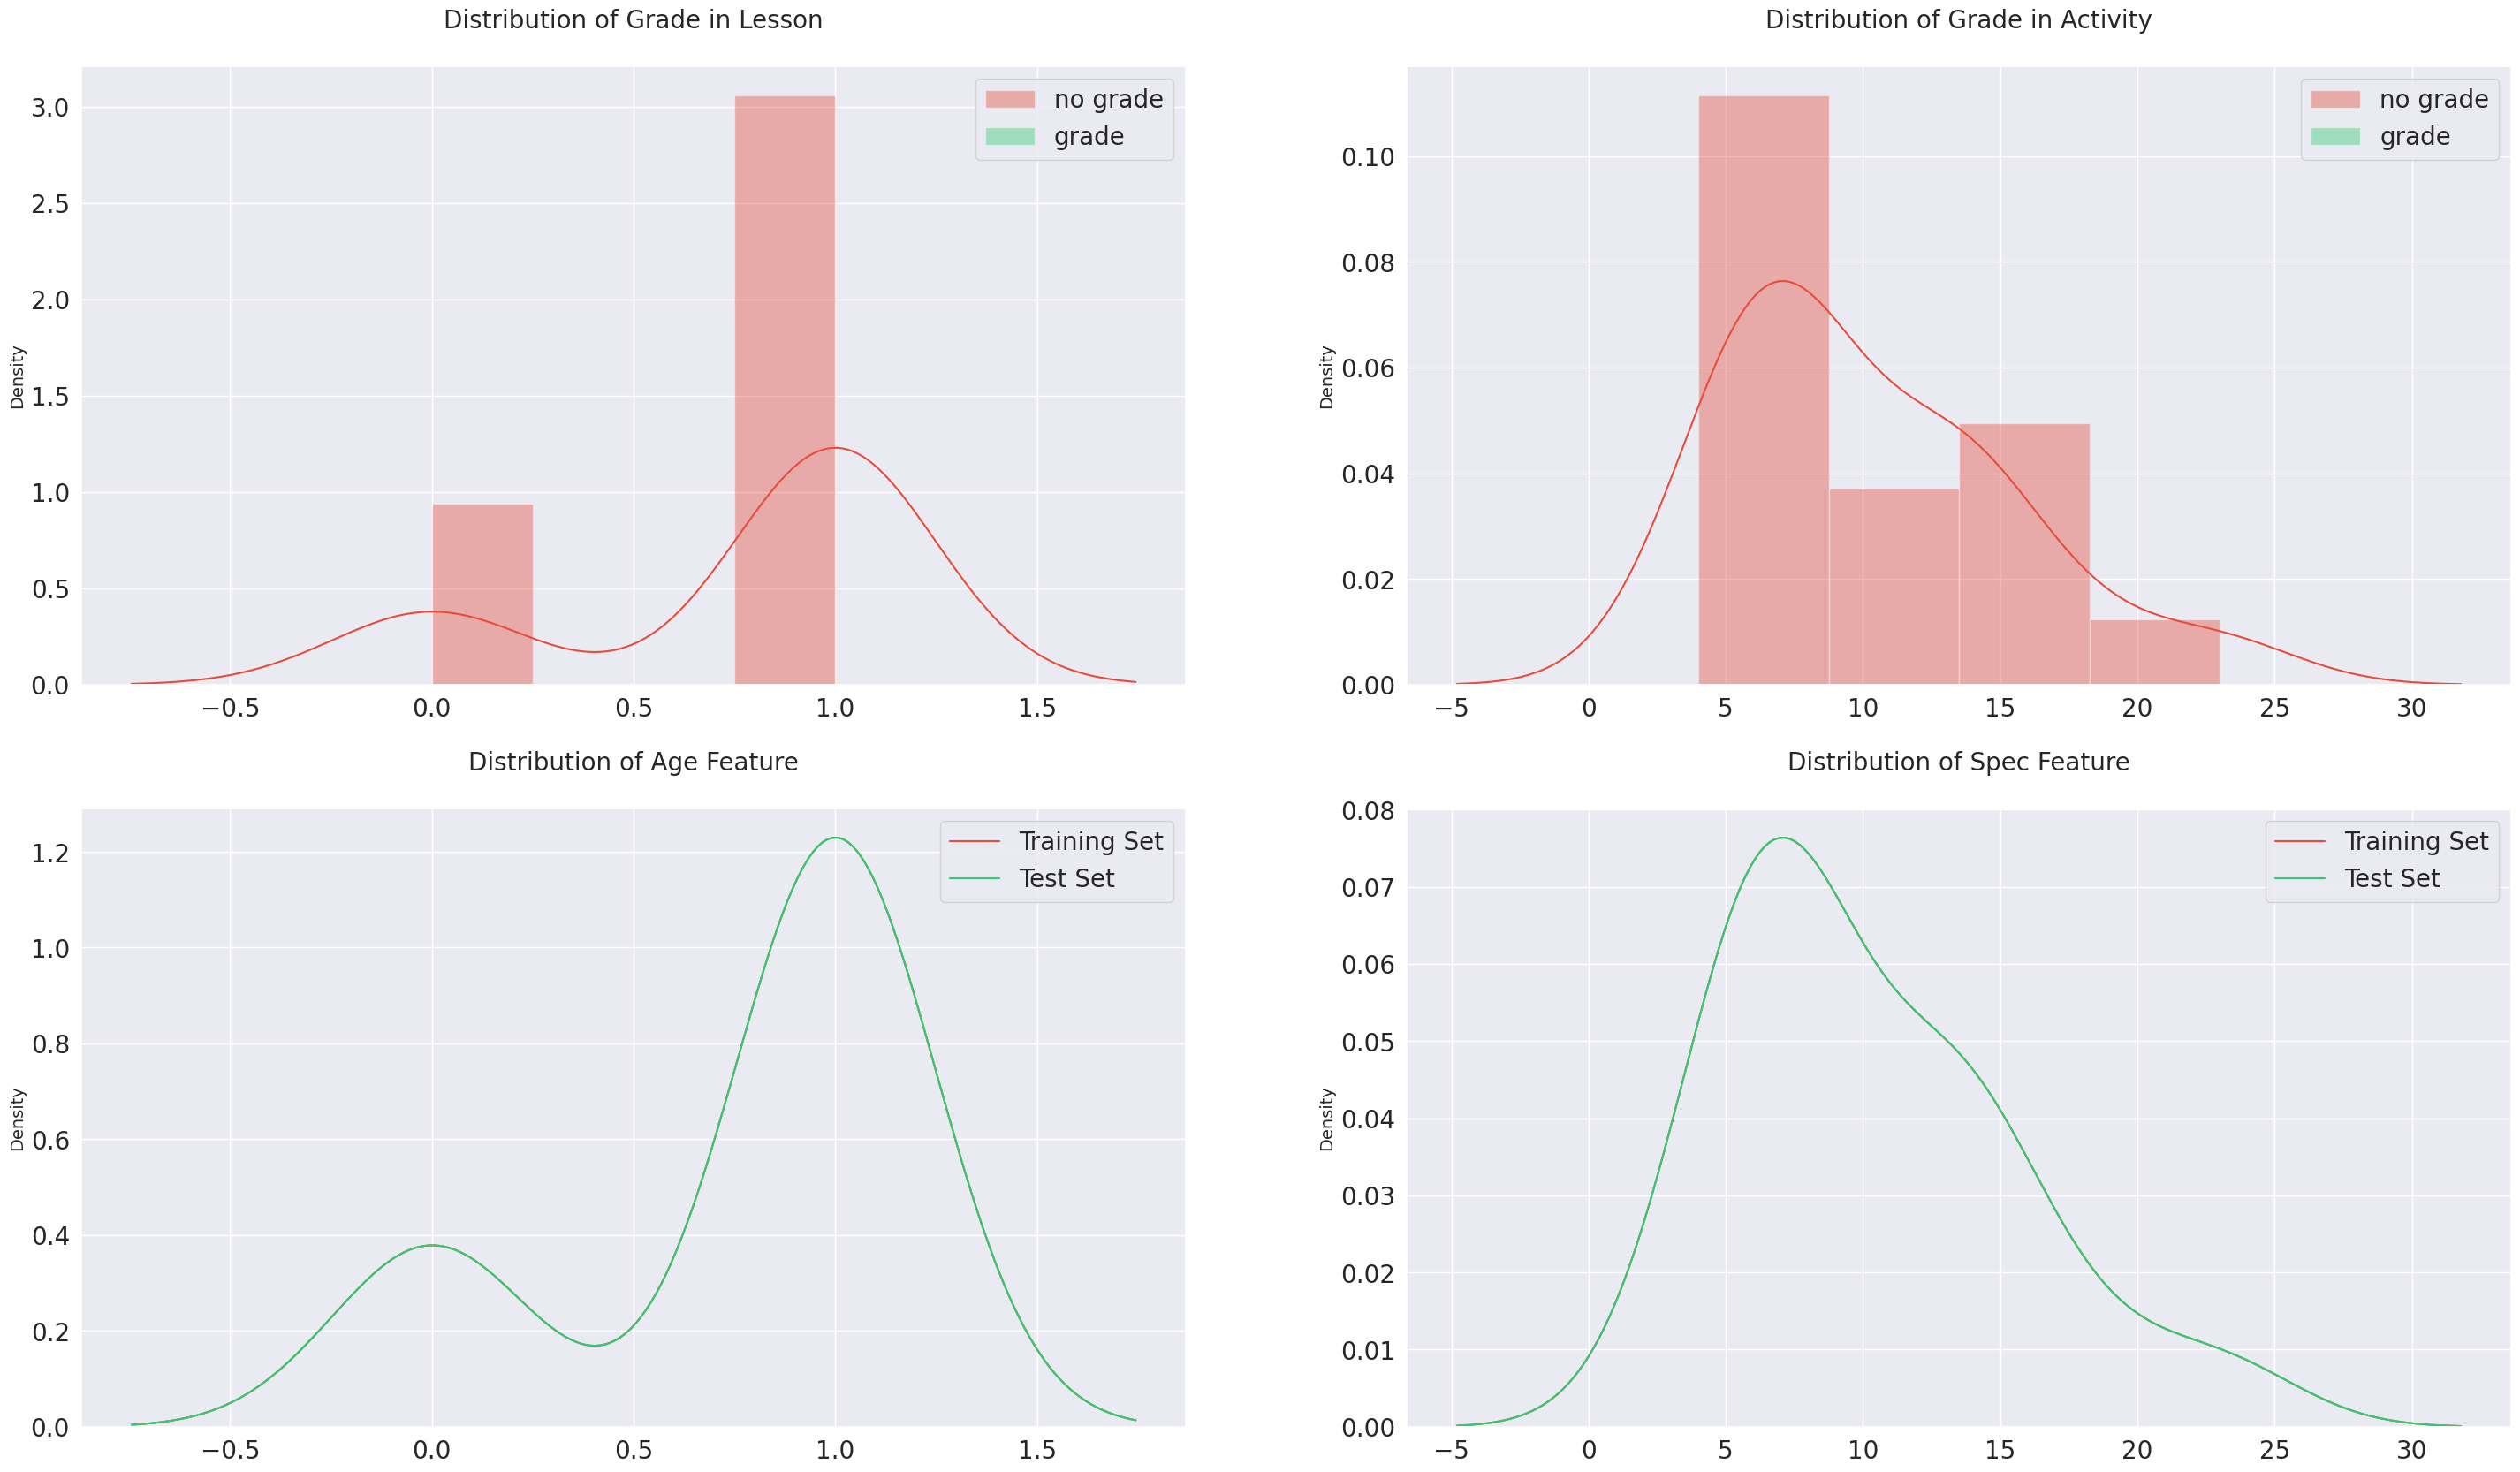

In [33]:
cont_features = ['Lesson', 'Activity']
grade = df_train['Grade'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of grading in feature
    sns.distplot(df_train[~grade][feature], label='no grade', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(df_train[grade][feature], label='grade', hist=True, color='#2ecc71', ax=axs[0][i])

    # Distribution of feature in dataset
    sns.distplot(df_train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])

    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')

    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)

    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Grade in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Spec'), size=20, y=1.05)

plt.show()

Categorical Features

<ipython-input-34-4a207da4a6ba>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-34-4a207da4a6ba>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-34-4a207da4a6ba>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
<ipython-input-34-4a207da4a6ba>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


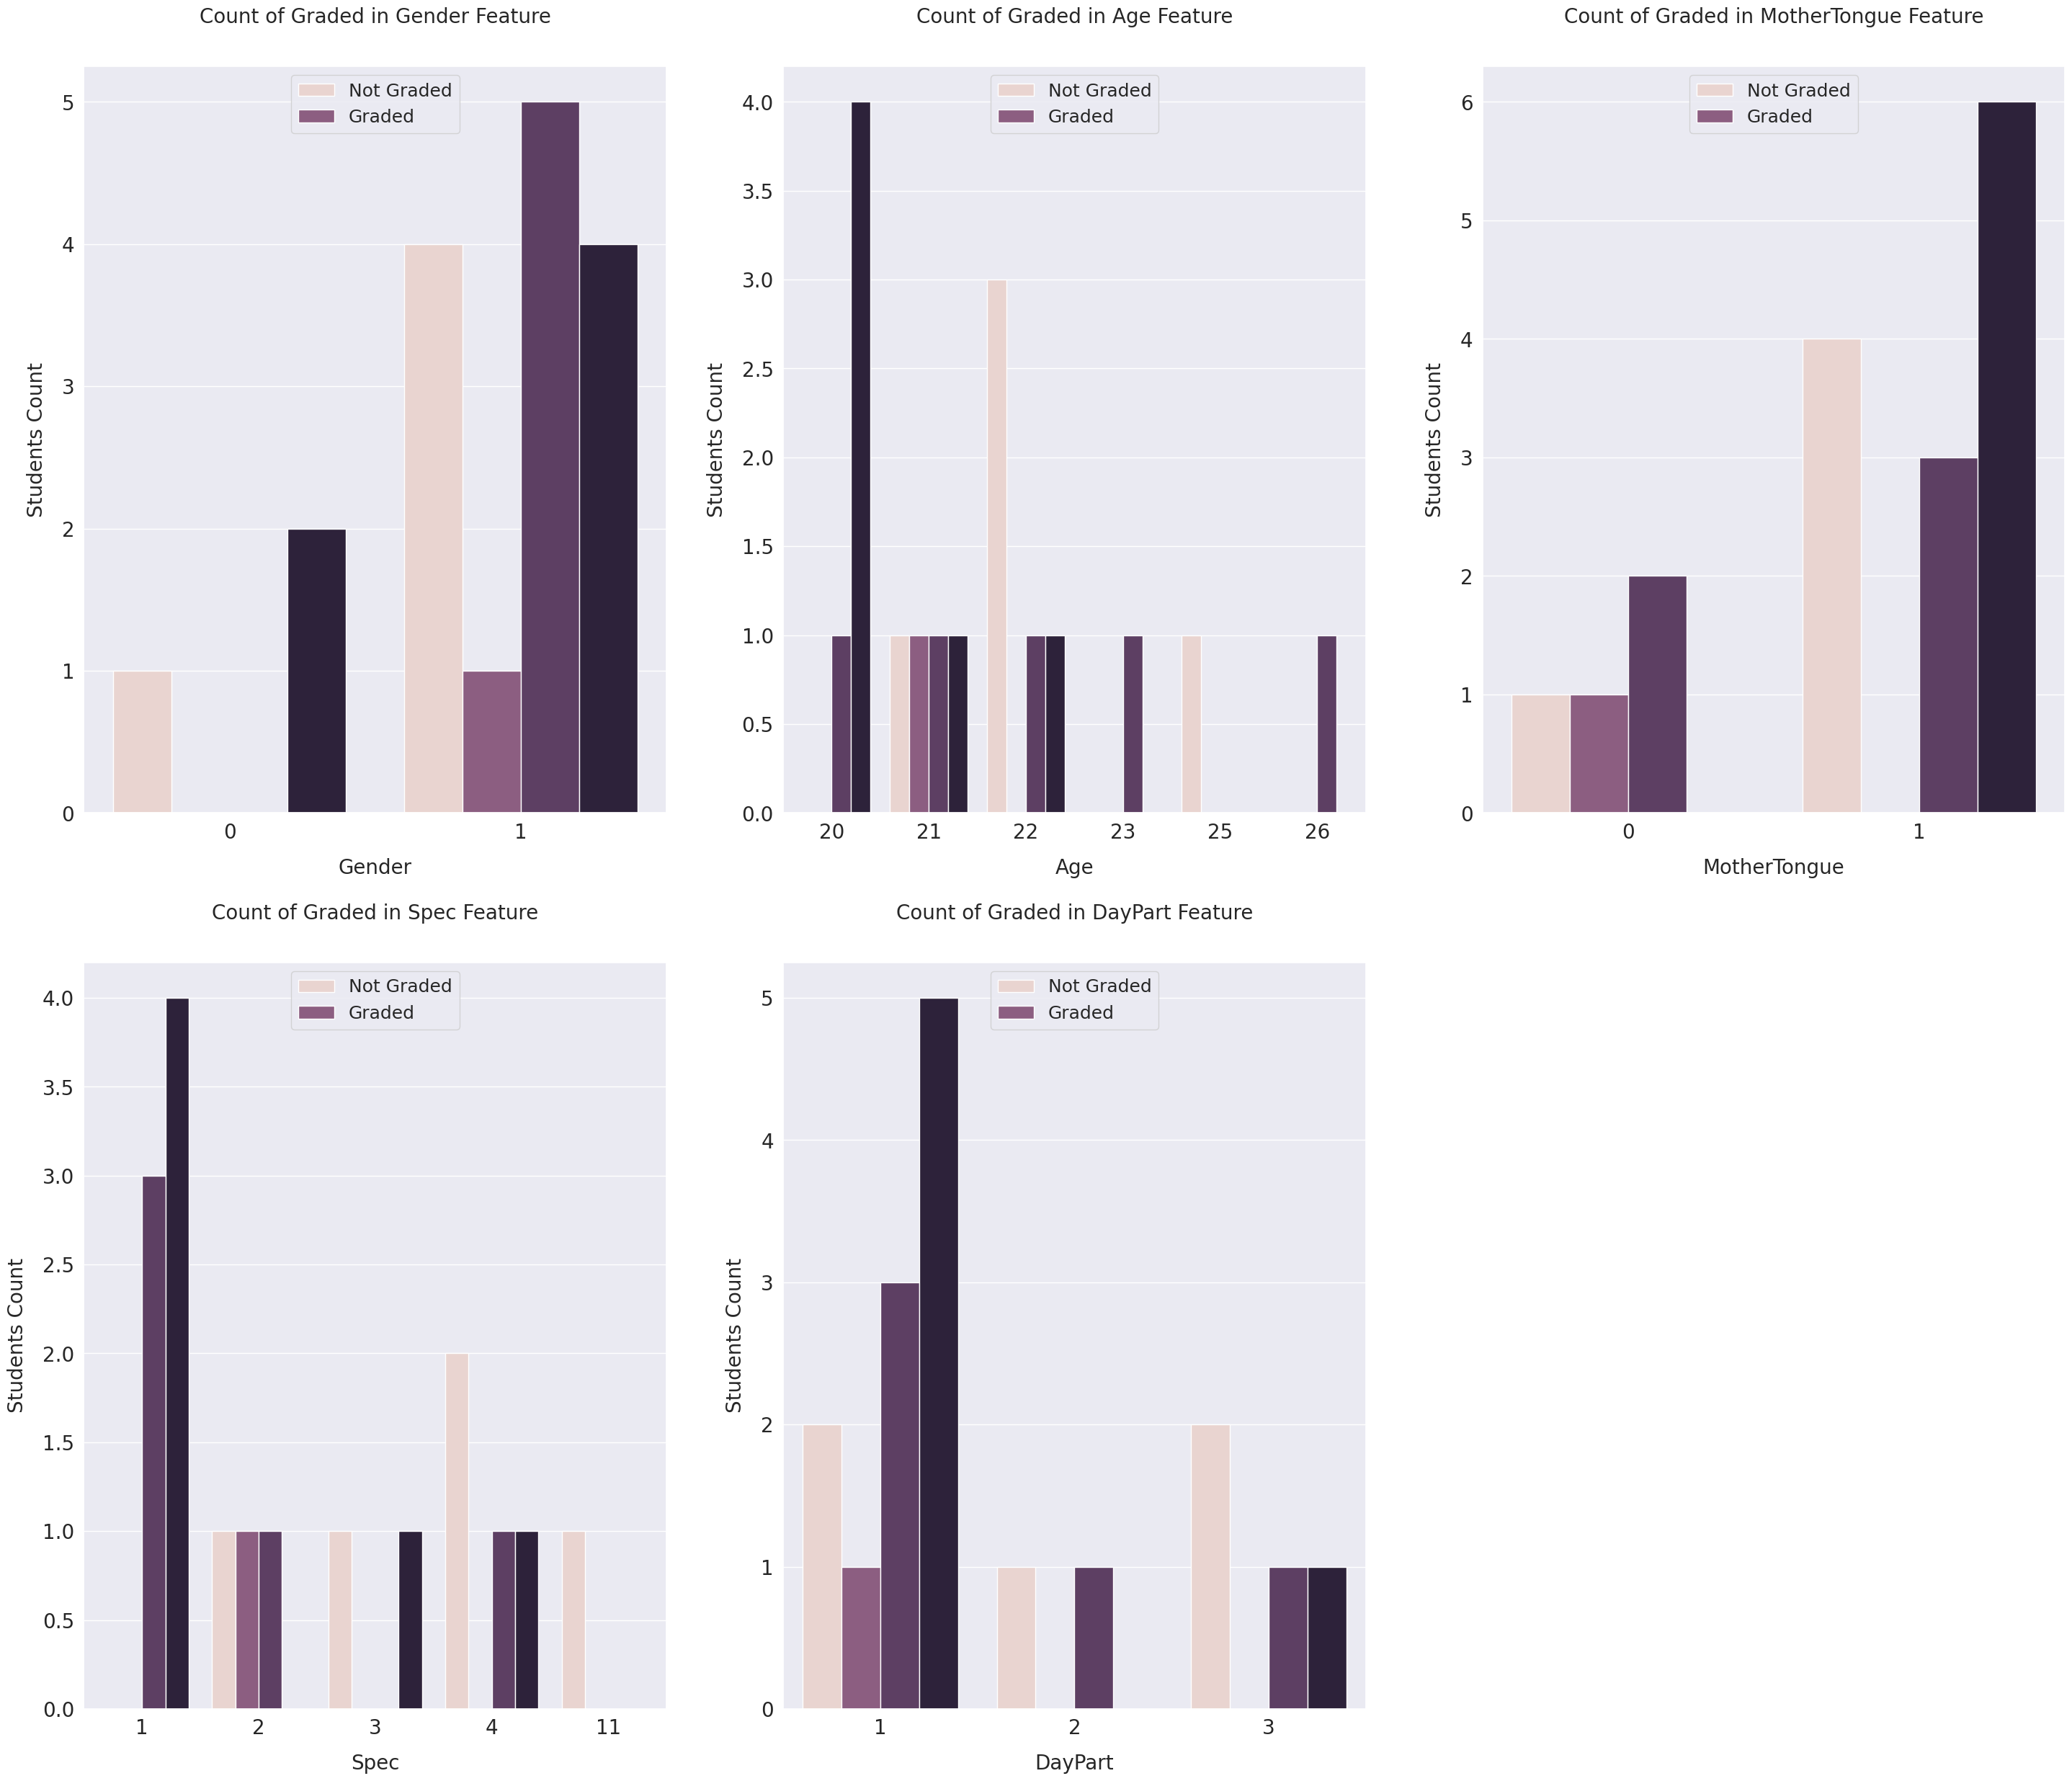

In [34]:
cat_features = ['Gender', 'Age', 'MotherTongue', 'Spec', 'DayPart']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Grade', data=df_train)

    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Students Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Graded', 'Graded'], loc='upper center', prop={'size': 18})
    plt.title('Count of Graded in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Most of the features are correlated with each other.